In [59]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# EU-wide Target: The EU has a binding target of at least 32% renewable energy in gross final energy consumption by 2030.

rating = {
    "Carbon intensity gCO₂eq/kWh (direct)": "N/A",
    "Carbon intensity gCO₂eq/kWh (Life cycle)": "N/A",
    "Carbon-free energy percentage (CFE%)": "N/A",
    "Renewable energy percentage (RE%)": "N/A"
}

In [ ]:
# get data in df (daily, could use any)

dailydf = pl.read_csv("./data/BE_2024_daily.csv", truncate_ragged_lines=True)

dailydf.head(5)

Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
str,str,str,str,f64,f64,f64,f64,str
"""2024-01-01 00:00:00""","""Belgium""","""Belgium""","""BE""",64.21,93.76,87.65,46.08,"""entsoe.eu"""
"""2024-01-02 00:00:00""","""Belgium""","""Belgium""","""BE""",60.08,87.38,88.23,43.8,"""entsoe.eu"""
"""2024-01-03 00:00:00""","""Belgium""","""Belgium""","""BE""",64.95,94.05,87.24,45.59,"""entsoe.eu"""
"""2024-01-04 00:00:00""","""Belgium""","""Belgium""","""BE""",92.49,129.22,79.93,33.55,"""entsoe.eu"""
"""2024-01-05 00:00:00""","""Belgium""","""Belgium""","""BE""",90.93,126.92,81.24,38.68,"""entsoe.eu"""


In [62]:
x = np.array(dailydf.get_column("Datetime (UTC)"))
y_carbon_intensity_direct = np.array(dailydf.get_column("Carbon intensity gCO₂eq/kWh (direct)"))
y_carbon_intensity_lifecycle = np.array(dailydf.get_column("Carbon intensity gCO₂eq/kWh (Life cycle)"))
y_carbon_free_energy = np.array(dailydf.get_column("Carbon-free energy percentage (CFE%)"))
y_renewable_energy = np.array(dailydf.get_column("Renewable energy percentage (RE%)"))

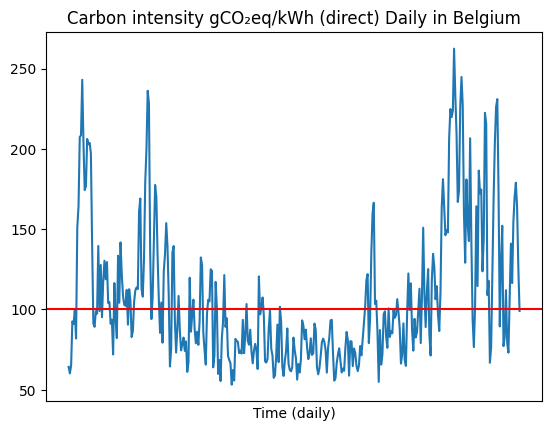

In [63]:
plt.plot(x, y_carbon_intensity_direct, label="Carbon intensity gCO₂eq/kWh (direct)")
plt.xlabel("Time (daily)") 
plt.title("Carbon intensity gCO₂eq/kWh (direct) Daily in Belgium")
# Belgium should aim for Carbon intensity gCO₂eq/kWh (direct) of below 100 consistently to achieve EU-wide Target for 2030
plt.axhline(y=100, color='r', linestyle='-')
plt.xticks([])
plt.show()

In [64]:
# how many days of 2024 were we above and below the threshold
count_days_above_100_gco2eqkwh_direct = 0
count_days_under_or_equal_100_gco2eqkwh_direct = 0

for num in enumerate(y_carbon_intensity_direct):
    if (num[1] > 100):
        count_days_above_100_gco2eqkwh_direct = count_days_above_100_gco2eqkwh_direct + 1
    else:
        count_days_under_or_equal_100_gco2eqkwh_direct = count_days_under_or_equal_100_gco2eqkwh_direct + 1

print("Above:", count_days_above_100_gco2eqkwh_direct)
print("Below:", count_days_under_or_equal_100_gco2eqkwh_direct)

# conclusion: we did good in 2024 as there are more days below the gco2 eq/kwh threshold

if (count_days_above_100_gco2eqkwh_direct < count_days_under_or_equal_100_gco2eqkwh_direct):
    print("Good Carbon intensity gCO₂eq/kWh (direct)!")
    rating["Carbon intensity gCO₂eq/kWh (direct)"] = "Good"

else:
    print("Bad Carbon intensity gCO₂eq/kWh (direct)!")
    rating["Carbon intensity gCO₂eq/kWh (direct)"] = "Bad"

Above: 155
Below: 211
Good Carbon intensity gCO₂eq/kWh (direct)!


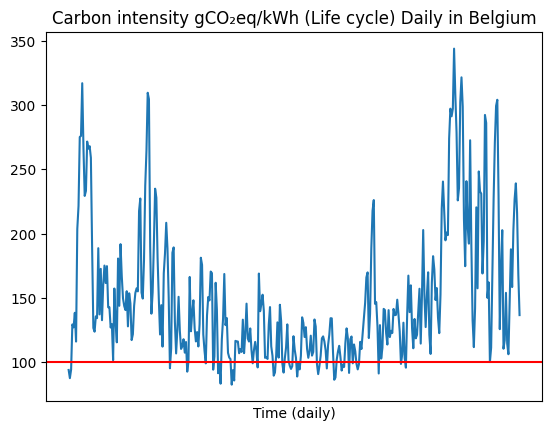

In [65]:
plt.plot(x, y_carbon_intensity_lifecycle, label="Carbon intensity gCO₂eq/kWh (Life cycle)")
plt.xlabel("Time (daily)") 
plt.title("Carbon intensity gCO₂eq/kWh (Life cycle) Daily in Belgium") 
# Belgium should aim for Carbon intensity gCO₂eq/kWh (Life cycle) of below 100 consistently to achieve EU-wide Target for 2030
plt.axhline(y=100, color='r', linestyle='-')
plt.xticks([])
plt.show()

In [66]:
# how many days of 2024 were we above and below the threshold
count_days_above_100_gco2eqkwh_lifecycle = 0
count_days_under_or_equal_100_gco2eqkwh_lifecycle = 0

for num in enumerate(y_carbon_intensity_lifecycle):
    if (num[1] > 100):
        count_days_above_100_gco2eqkwh_lifecycle = count_days_above_100_gco2eqkwh_lifecycle + 1
    else:
        count_days_under_or_equal_100_gco2eqkwh_lifecycle = count_days_under_or_equal_100_gco2eqkwh_lifecycle + 1

print("Above:", count_days_above_100_gco2eqkwh_lifecycle)
print("Below:", count_days_under_or_equal_100_gco2eqkwh_lifecycle)

# conclusion: we did not do good in 2024 as there are more days below the gco2 eq/kwh lifecycle threshold

if (count_days_above_100_gco2eqkwh_lifecycle < count_days_under_or_equal_100_gco2eqkwh_lifecycle):
    print("Good Carbon intensity gCO₂eq/kWh (lifecycle)!")
    rating["Carbon intensity gCO₂eq/kWh (Life cycle)"] = "Good"

else:
    print("Bad Carbon intensity gCO₂eq/kWh (lifecycle)!")
    rating["Carbon intensity gCO₂eq/kWh (Life cycle)"] = "Bad"

Above: 323
Below: 43
Bad Carbon intensity gCO₂eq/kWh (lifecycle)!


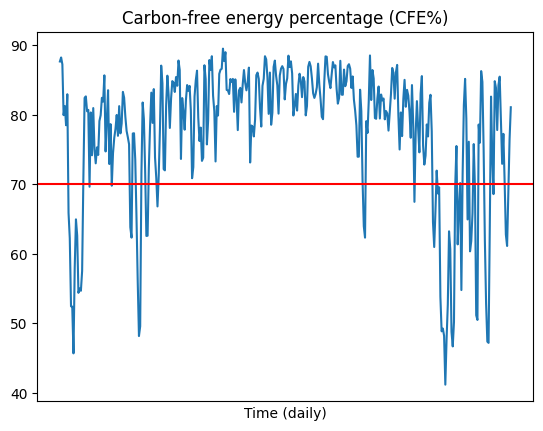

In [67]:
plt.plot(x, y_carbon_free_energy, label="Carbon-free energy percentage (CFE%)")
plt.xlabel("Time (daily)") 
plt.title("Carbon-free energy percentage (CFE%)") 
# Belgium should aim for Carbon-free energy percentage (CFE%) of above 70 consistently to achieve EU-wide Target for 2030
plt.axhline(y=70, color='r', linestyle='-')
plt.xticks([])
plt.show()

In [68]:
# how many days of 2024 were we above and below the threshold
count_days_above_70_cfe = 0
count_days_under_or_equal_70_cfe = 0

for num in enumerate(y_carbon_free_energy):
    if (num[1] > 70):
        count_days_above_70_cfe = count_days_above_70_cfe + 1
    else:
        count_days_under_or_equal_70_cfe = count_days_under_or_equal_70_cfe + 1

print("Above:", count_days_above_70_cfe)
print("Below:", count_days_under_or_equal_70_cfe)

# conclusion: we did good in 2024 as there are more days above the cfe% threshold

if (count_days_above_70_cfe < count_days_under_or_equal_70_cfe):
    print("Bad Carbon-free energy percentage (CFE%)!")
    rating["Carbon-free energy percentage (CFE%)"] = "Bad"

else:
    print("Good Carbon-free energy percentage (CFE%)!")
    rating["Carbon-free energy percentage (CFE%)"] = "Good"

Above: 303
Below: 63
Good Carbon-free energy percentage (CFE%)!


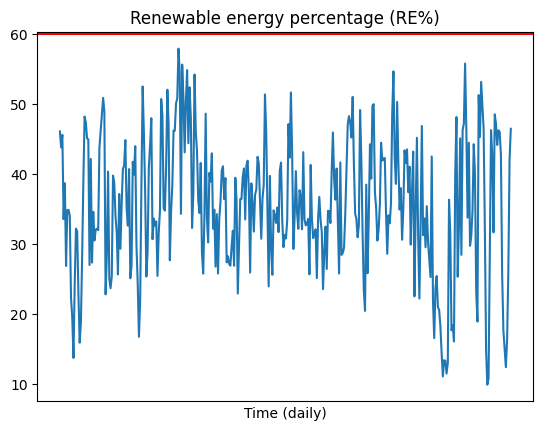

In [69]:
plt.plot(x, y_renewable_energy, label="Renewable energy percentage (RE%)")
plt.xlabel("Time (daily)") 
plt.title("Renewable energy percentage (RE%)") 
# Belgium should aim for Renewable energy percentage (RE%) of above 60 consistently to achieve EU-wide Target for 2030
plt.axhline(y=60, color='r', linestyle='-')
plt.xticks([])
plt.show()

In [70]:
# how many days of 2024 were we above and below the threshold
count_days_above_60_re = 0
count_days_under_or_equal_60_re = 0

for num in enumerate(y_renewable_energy):
    if (num[1] > 60):
        count_days_above_60_re = count_days_above_60_re + 1
    else:
        count_days_under_or_equal_60_re = count_days_under_or_equal_60_re + 1

print("Above:", count_days_above_60_re)
print("Below:", count_days_under_or_equal_60_re)

# conclusion: we did horribly in 2024 as there are NO days above the re% threshold

if (count_days_above_60_re < count_days_under_or_equal_60_re):
    print("Bad Renewable energy percentage (RE%)!")
    rating["Renewable energy percentage (RE%)"] = "Bad"

else:
    print("Good Renewable energy percentage (RE%)!")
    rating["Renewable energy percentage (RE%)"] = "Good"

Above: 0
Below: 366
Bad Renewable energy percentage (RE%)!


In [71]:
# summary of analysis

for item in rating:
    print(item + ": " + rating[item])

Carbon intensity gCO₂eq/kWh (direct): Good
Carbon intensity gCO₂eq/kWh (Life cycle): Bad
Carbon-free energy percentage (CFE%): Good
Renewable energy percentage (RE%): Bad
